# Instance Generation for Tabu Search Testing

This notebook generates 24 test instances following the cartesian product:
- **Grid Size**: {small, medium, large} = 3 options
- **Obstacles**: {no obstacles, many small ones} = 2 options
- **Border**: {no obstacle border, with border} = 2 options
- **Sprayer Length**: {small (12), large (20)} = 2 options

Total: 3 × 2 × 2 × 2 = 24 instances

In [1]:
from agricultural_csp.instance import AgcspInstance
from agricultural_csp.evaluator import AgcspEvaluator
from agricultural_csp.solution import AgcspSolution
from agricultural_csp.solver.agcsp_ts import *

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

Node = Tuple[float, float]

In [2]:
def display_grid_and_path(inst, evaluator, path, title_suffix=""):
    """
    Display a grid with nodes and path coverage visualization.
    
    Args:
        inst: AgcspInstance object containing grid_nodes and obstacle_nodes
        evaluator: AgcspEvaluator object to calculate coverage
        path: List of (row, col) tuples representing the path
        title_suffix: Additional text to add to the title
    """
    covered_nodes = evaluator.get_covered_nodes_list(path) if len(path) > 0 else []
    
    total_nodes = inst.target_node_count
    covered_count = len(covered_nodes)
    coverage_percentage = (covered_count / total_nodes) * 100 if total_nodes > 0 else 0
    
    # Check for obstacle coverage
    covered_obstacles = []
    obstacle_warning = ""
    if hasattr(inst, 'obstacle_nodes') and len(inst.obstacle_nodes) > 0:
        covered_set = set(map(tuple, covered_nodes))
        covered_obstacles = [obs for obs in inst.obstacle_nodes if tuple(obs) in covered_set]
        if covered_obstacles:
            obstacle_warning = f" - {len(covered_obstacles)} obstacles covered!"
    
    plt.figure(figsize=(10, 8))
    
    # Plot valid nodes
    plt.scatter(inst.grid_nodes[:, 0], inst.grid_nodes[:, 1], c='#AAAAAA', s=3, 
               label='Uncovered Nodes', alpha=0.7)
    
    if len(covered_nodes) > 0:
        plt.scatter(covered_nodes[:, 0], covered_nodes[:, 1], c='#00AA44', s=4, 
                   label='Covered Nodes', alpha=0.8)
    
    # Plot obstacles
    if hasattr(inst, 'obstacle_nodes') and len(inst.obstacle_nodes) > 0:
        plt.scatter(inst.obstacle_nodes[:, 0], inst.obstacle_nodes[:, 1], c='#CC0000', s=4, 
                   marker='s', label='Obstacles', linewidths=0.5)
        
        # Highlight covered obstacles
        if covered_obstacles:
            covered_obstacles_arr = np.array(covered_obstacles)
            plt.scatter(covered_obstacles_arr[:, 0], covered_obstacles_arr[:, 1], 
                       c='#FF6600', s=10, marker='D', 
                       linewidths=2, label='Covered Obstacles')
    
    # Plot path
    if len(path) > 0:
        path_arr = np.array(path)
        plt.plot(path_arr[:, 0], path_arr[:, 1], color='#9900CC', linewidth=2, 
                label='Sprayer Path', marker='o', markersize=4, markerfacecolor='white', 
                markeredgecolor='#9900CC', markeredgewidth=1.5)
        
        # Plot start point (green star)
        plt.scatter(path_arr[0, 0], path_arr[0, 1], c='#00DD00', s=150, 
                   marker='*', label='Start', edgecolors='black', linewidths=1.5, zorder=5)
        
        # Plot end point (red square)
        if len(path) > 1:
            plt.scatter(path_arr[-1, 0], path_arr[-1, 1], c='#DD0000', s=80, 
                       marker='s', label='End', edgecolors='black', linewidths=1.5, zorder=5)
    
    plt.axis('equal')
    plt.legend(loc='upper right', framealpha=0.9, fontsize=8)
    
    title = f'{title_suffix}\nCoverage: {covered_count}/{total_nodes} nodes ({coverage_percentage:.1f}%){obstacle_warning}'
    plt.title(title, fontsize=10, fontweight='bold')
    
    print(f"{title_suffix}")
    print(f"Coverage: {covered_count}/{total_nodes} nodes ({coverage_percentage:.1f}%)")
    if hasattr(inst, 'obstacle_nodes') and len(inst.obstacle_nodes) > 0:
        print(f"Obstacles: {len(covered_obstacles)}/{len(inst.obstacle_nodes)} covered")
        if covered_obstacles:
            print("WARNING: Sprayer is covering obstacles!")
    
    plt.show()

## Instance Generation Functions

In [ ]:
from agricultural_csp.tools import display_grid_and_path

## Generate All 24 Instances

In [4]:
# Define the cartesian product parameters
sizes = ['small', 'medium', 'large']
obstacle_types = ['none', 'many_small', 'few_large']
borders = [False, True]
sprayer_lengths = [12, 20]  # small and large sprayer lengths

# Generate all instances (3 x 2 x 2 x 2 = 24)
instances = {}
instance_counter = 1

for size in sizes:
    for obstacle_type in obstacle_types:
        # Skip some combinations to keep exactly 24 instances
        # We'll use: all 3 sizes × 2 obstacle types (none, many_small) × 2 borders × 2 sprayer lengths = 24
        if obstacle_type == 'few_large':
            continue  # Skip few_large to get exactly 24 instances
        
        for border in borders:
            for sprayer_length in sprayer_lengths:
                # Create descriptive name
                border_str = "with_border" if border else "no_border"
                sprayer_str = f"spray{sprayer_length}"
                instance_name = f"inst_{instance_counter:02d}_{size}_{obstacle_type}_{border_str}_{sprayer_str}"
                
                print(f"Creating {instance_name}...")
                
                # Create instance with specified sprayer length
                inst = create_instance(size, obstacle_type, border, sprayer_length=sprayer_length)
                
                # Store instance with metadata
                instances[instance_name] = {
                    'instance': inst,
                    'size': size,
                    'obstacle_type': obstacle_type,
                    'border': border,
                    'sprayer_length': sprayer_length,
                    'evaluator': AgcspEvaluator(inst)
                }
                
                instance_counter += 1

print(f"\n✓ Successfully created {len(instances)} instances")

Creating inst_01_small_none_no_border...
Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (1417 nós)
Creating inst_02_small_none_with_border...
Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (1732 nós)
Creating inst_03_small_few_small_no_border...
Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (1809 nós)
Creating inst_04_small_few_small_with_border...
Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (2107 nós)
Creating inst_05_small_many_small_no_border...
Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (2042 nós)
Creating inst_06_small_many_small_with_border...
Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (2297 nós)
Creating inst_07_small_few_large_no_border...
Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (2138 nós)
C

## Visualize All Instances

Display all 24 instances without any paths (empty paths).

inst_01_small_none_no_border: small, none, no border
Coverage: 0/2500 nodes (0.0%)


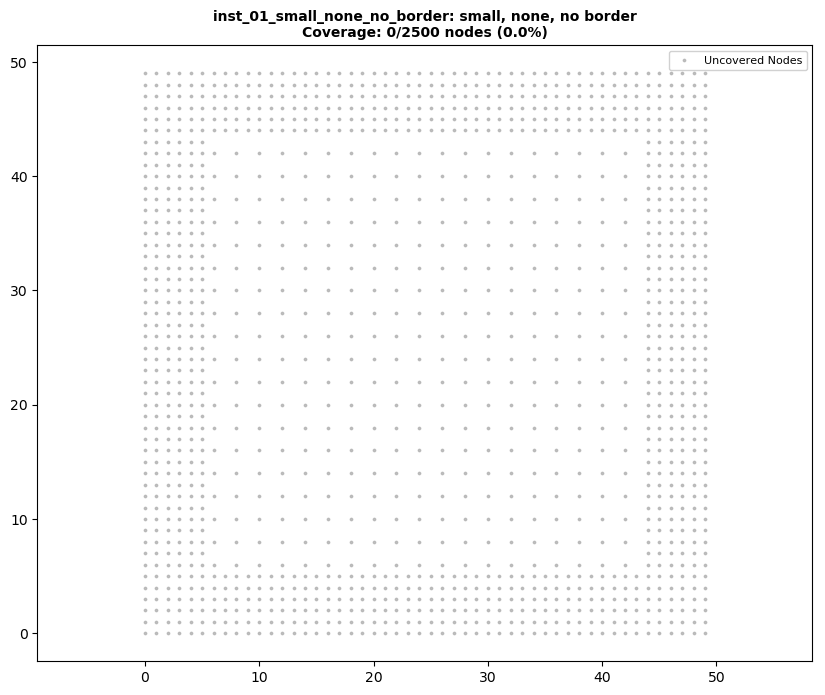

--------------------------------------------------------------------------------
inst_02_small_none_with_border: small, none, with border
Coverage: 0/2076 nodes (0.0%)
Obstacles: 0/440 covered


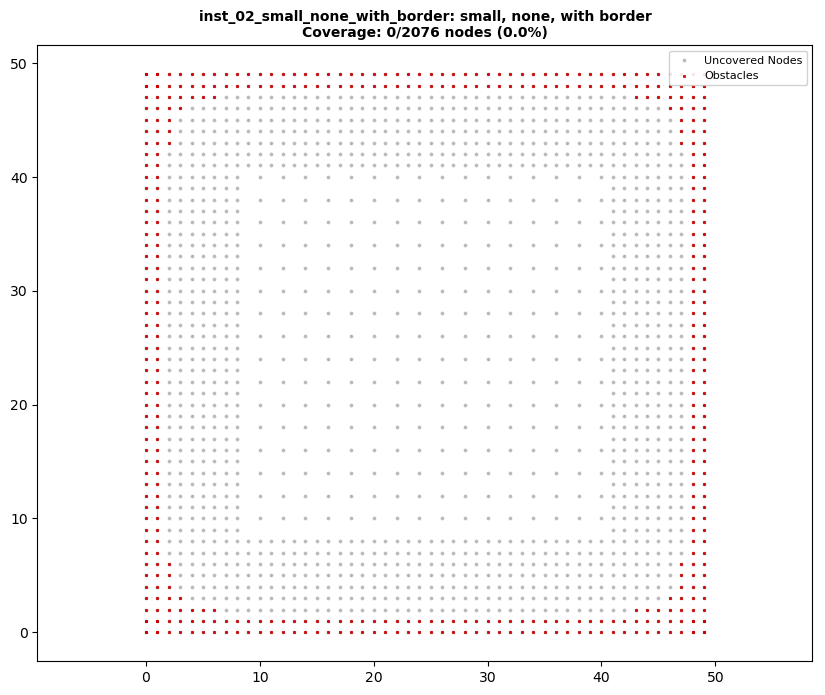

--------------------------------------------------------------------------------
inst_03_small_few_small_no_border: small, few small, no border
Coverage: 0/2419 nodes (0.0%)
Obstacles: 0/85 covered


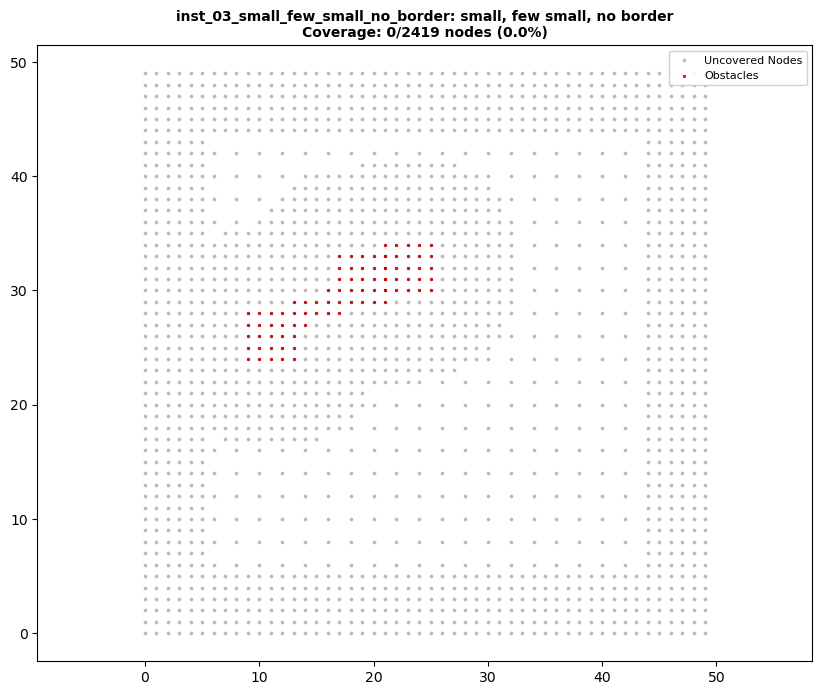

--------------------------------------------------------------------------------
inst_04_small_few_small_with_border: small, few small, with border
Coverage: 0/1907 nodes (0.0%)
Obstacles: 0/609 covered


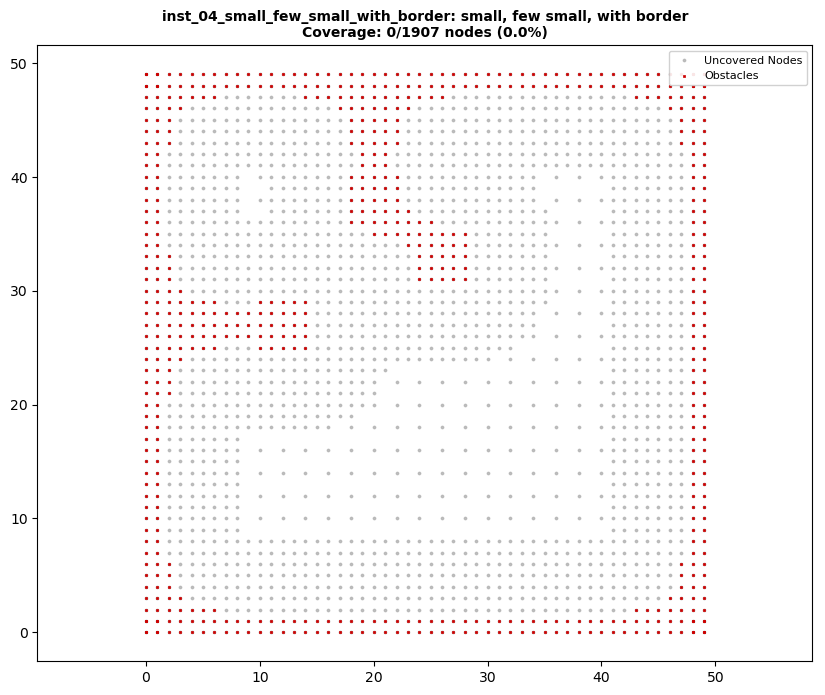

--------------------------------------------------------------------------------
inst_05_small_many_small_no_border: small, many small, no border
Coverage: 0/2351 nodes (0.0%)
Obstacles: 0/155 covered


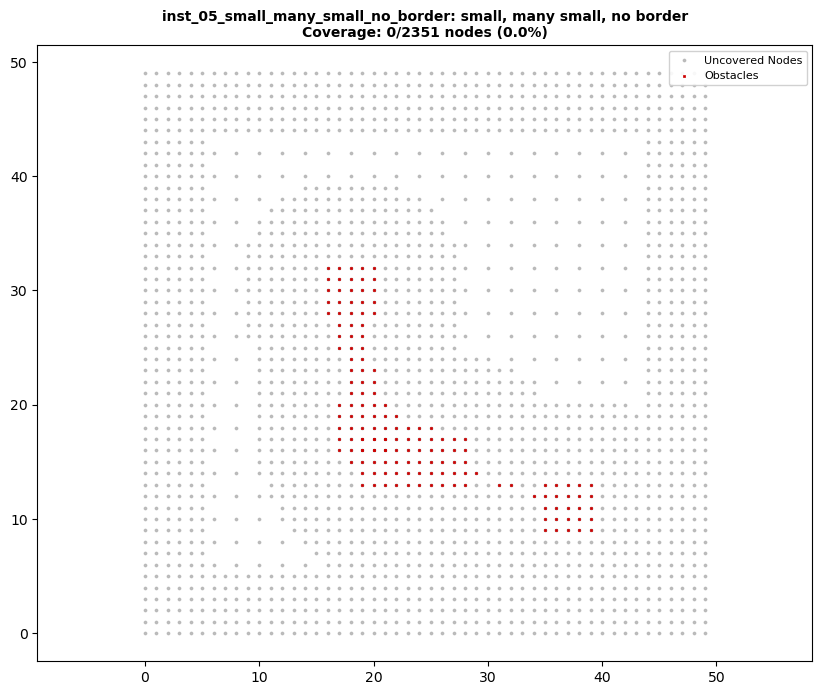

--------------------------------------------------------------------------------
inst_06_small_many_small_with_border: small, many small, with border
Coverage: 0/1692 nodes (0.0%)
Obstacles: 0/824 covered


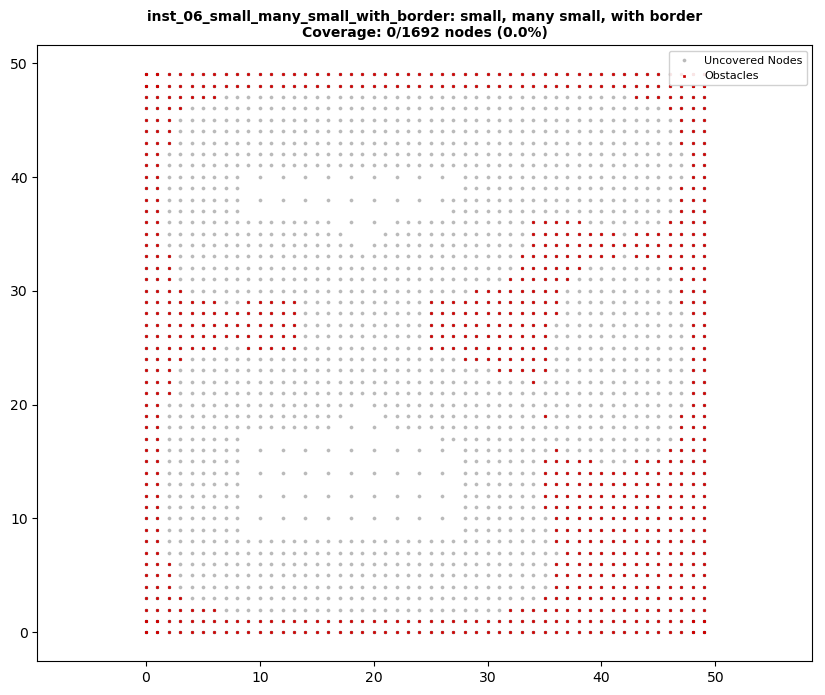

--------------------------------------------------------------------------------
inst_07_small_few_large_no_border: small, few large, no border
Coverage: 0/2224 nodes (0.0%)
Obstacles: 0/276 covered


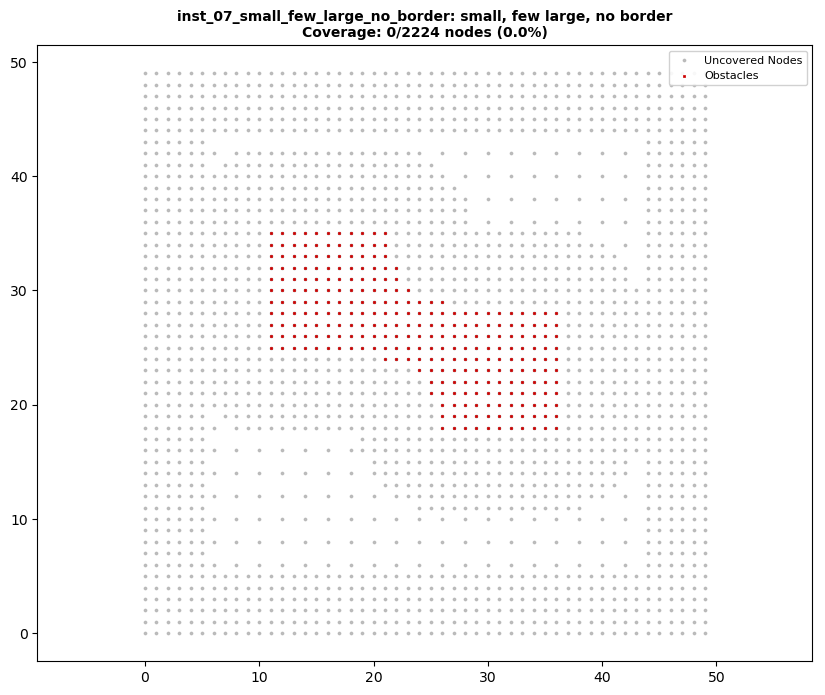

--------------------------------------------------------------------------------
inst_08_small_few_large_with_border: small, few large, with border
Coverage: 0/1714 nodes (0.0%)
Obstacles: 0/802 covered


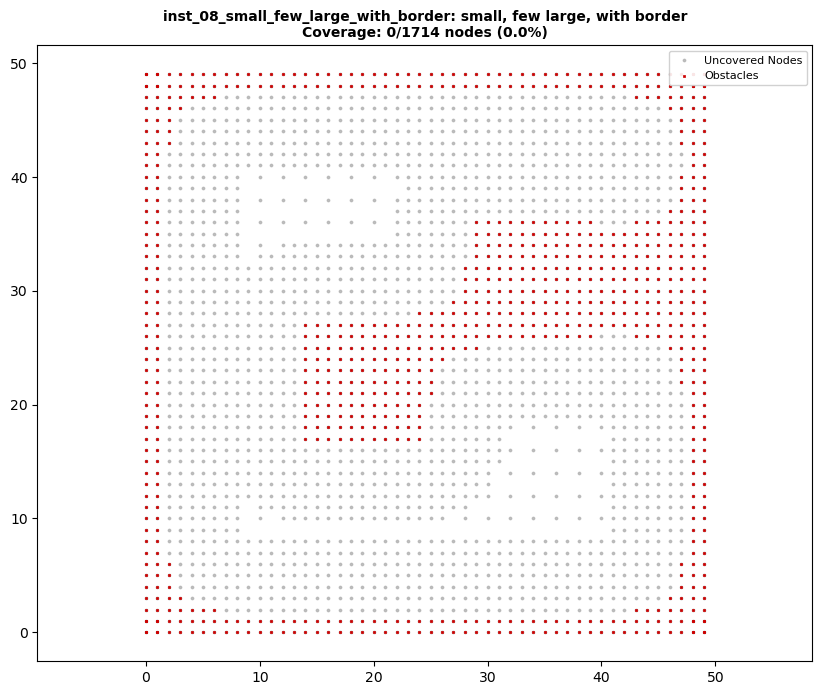

--------------------------------------------------------------------------------
inst_09_medium_none_no_border: medium, none, no border
Coverage: 0/10000 nodes (0.0%)


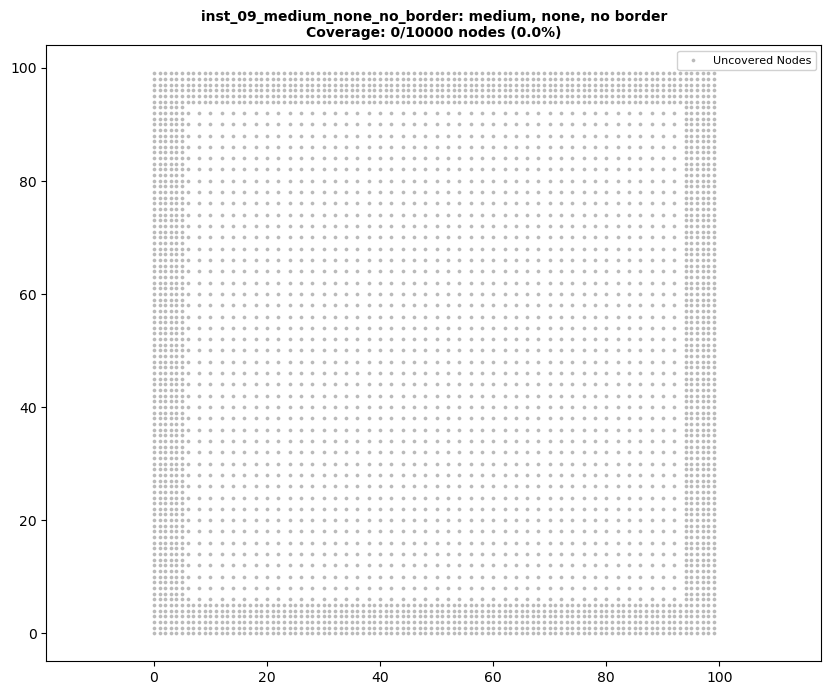

--------------------------------------------------------------------------------
inst_10_medium_none_with_border: medium, none, with border
Coverage: 0/9176 nodes (0.0%)
Obstacles: 0/840 covered


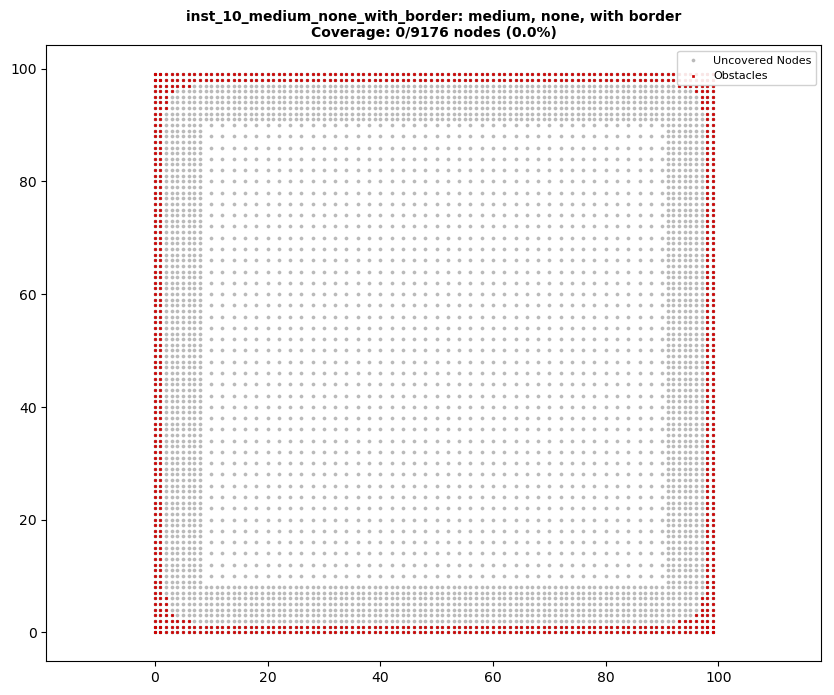

--------------------------------------------------------------------------------
inst_11_medium_few_small_no_border: medium, few small, no border
Coverage: 0/9925 nodes (0.0%)
Obstacles: 0/75 covered


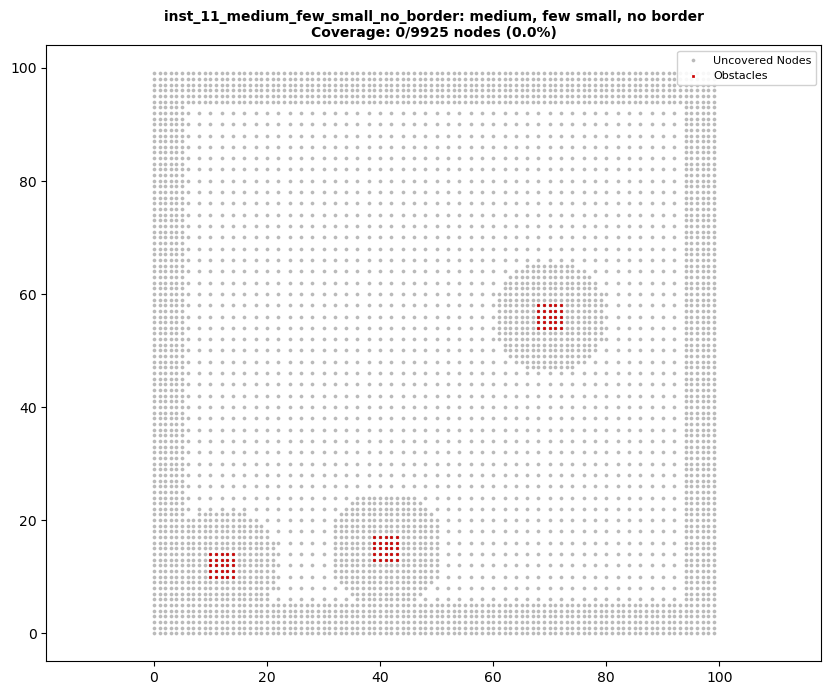

--------------------------------------------------------------------------------
inst_12_medium_few_small_with_border: medium, few small, with border
Coverage: 0/9066 nodes (0.0%)
Obstacles: 0/950 covered
inst_12_medium_few_small_with_border: medium, few small, with border
Coverage: 0/9066 nodes (0.0%)
Obstacles: 0/950 covered


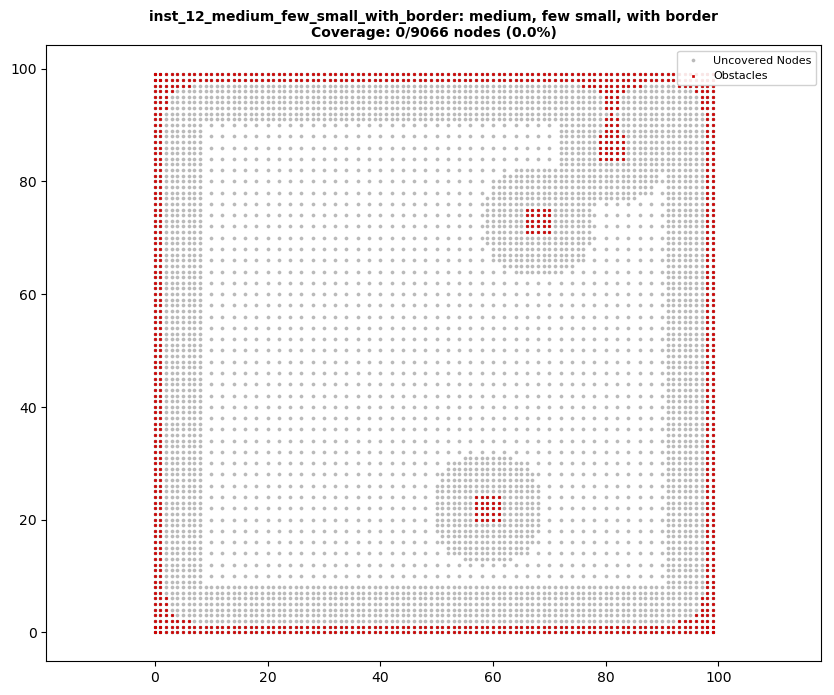

--------------------------------------------------------------------------------
inst_13_medium_many_small_no_border: medium, many small, no border
Coverage: 0/9861 nodes (0.0%)
Obstacles: 0/151 covered


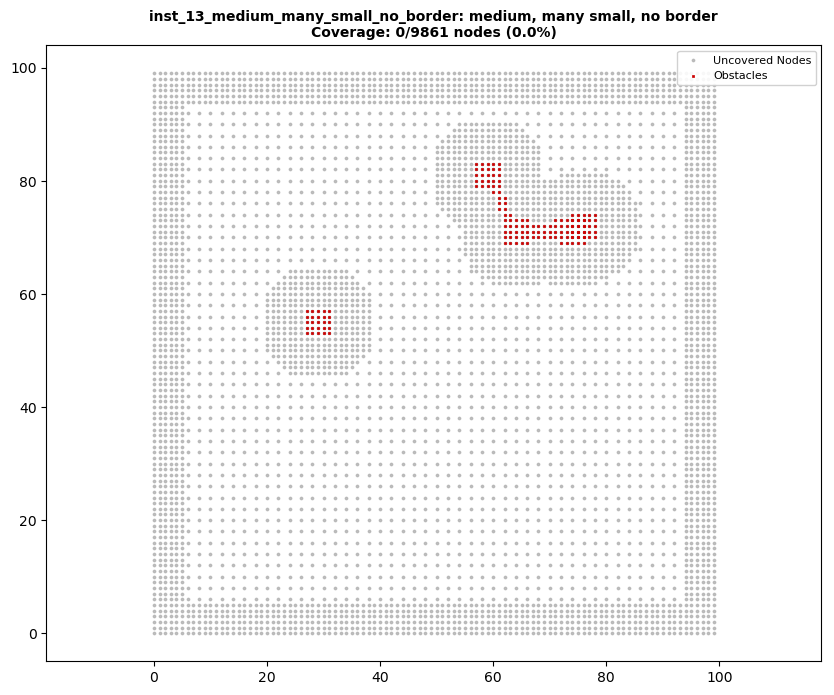

--------------------------------------------------------------------------------
inst_14_medium_many_small_with_border: medium, many small, with border
Coverage: 0/8963 nodes (0.0%)
Obstacles: 0/1053 covered


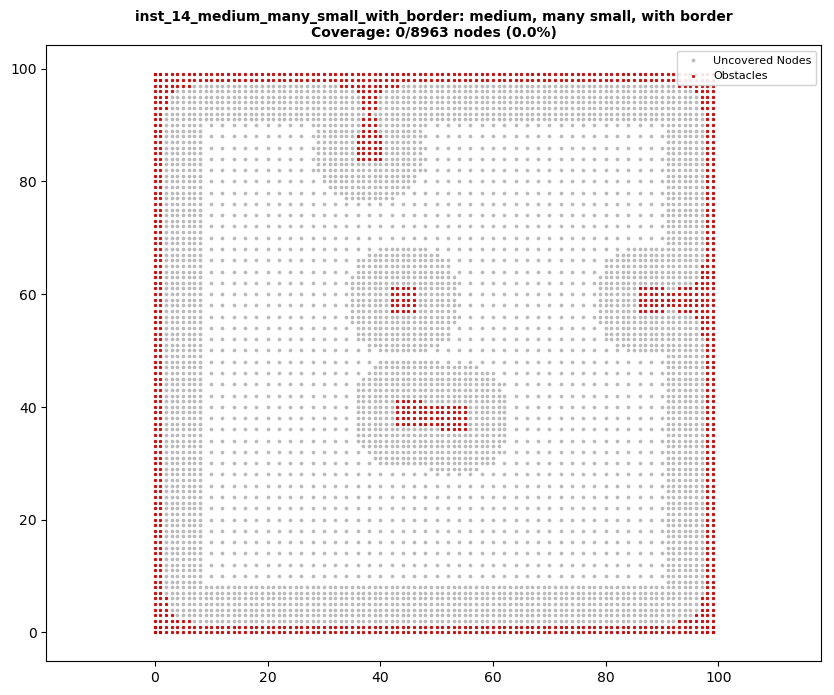

--------------------------------------------------------------------------------
inst_15_medium_few_large_no_border: medium, few large, no border
Coverage: 0/9662 nodes (0.0%)
Obstacles: 0/338 covered
inst_15_medium_few_large_no_border: medium, few large, no border
Coverage: 0/9662 nodes (0.0%)
Obstacles: 0/338 covered


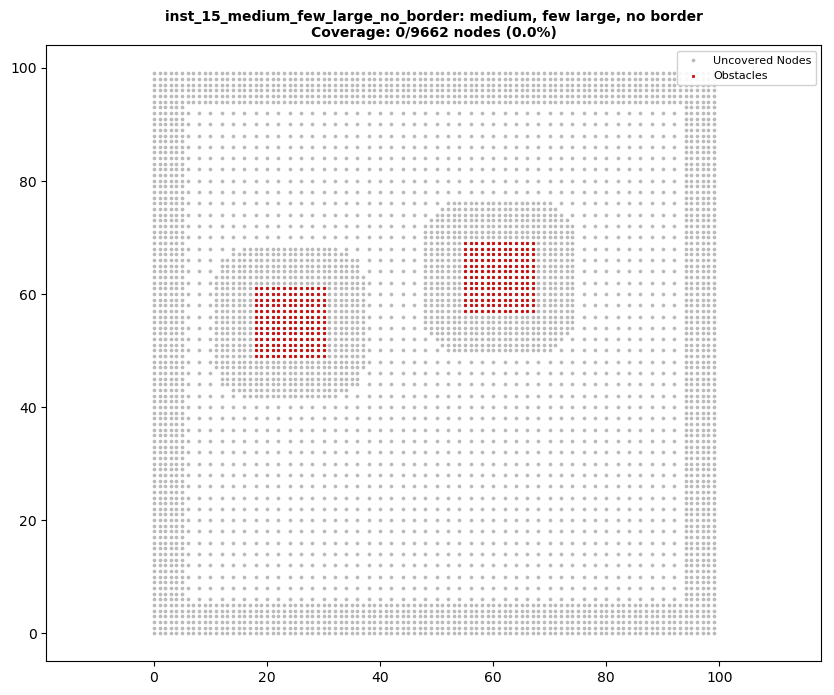

--------------------------------------------------------------------------------
inst_16_medium_few_large_with_border: medium, few large, with border
Coverage: 0/8730 nodes (0.0%)
Obstacles: 0/1286 covered


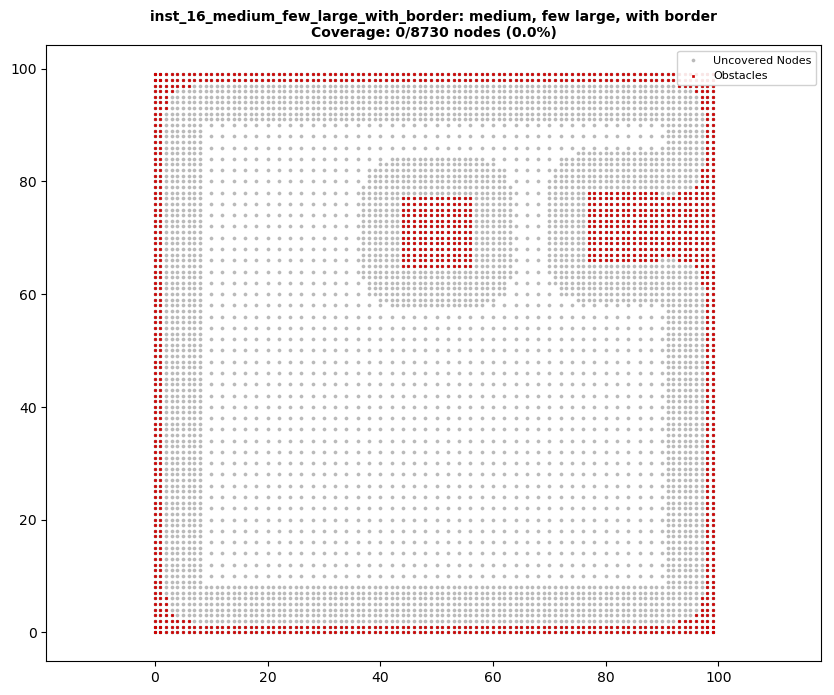

--------------------------------------------------------------------------------
inst_17_large_none_no_border: large, none, no border
Coverage: 0/22500 nodes (0.0%)


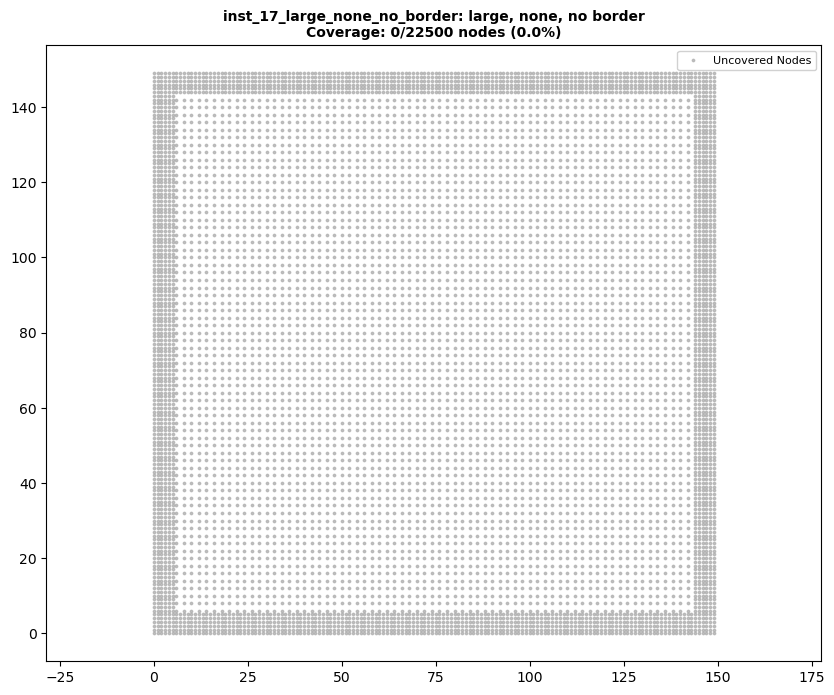

--------------------------------------------------------------------------------
inst_18_large_none_with_border: large, none, with border
Coverage: 0/21276 nodes (0.0%)
Obstacles: 0/1240 covered


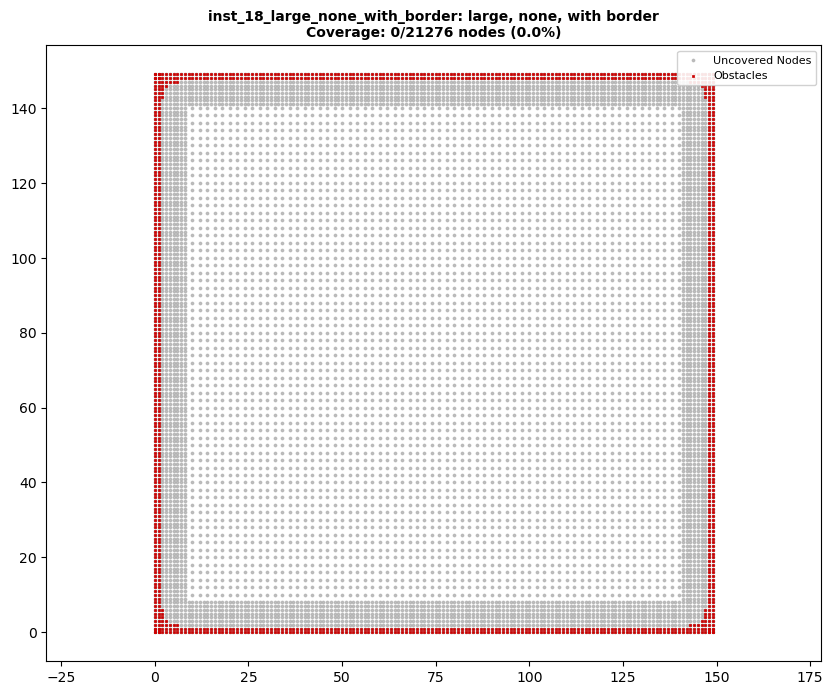

--------------------------------------------------------------------------------
inst_19_large_few_small_no_border: large, few small, no border
Coverage: 0/22419 nodes (0.0%)
Obstacles: 0/81 covered


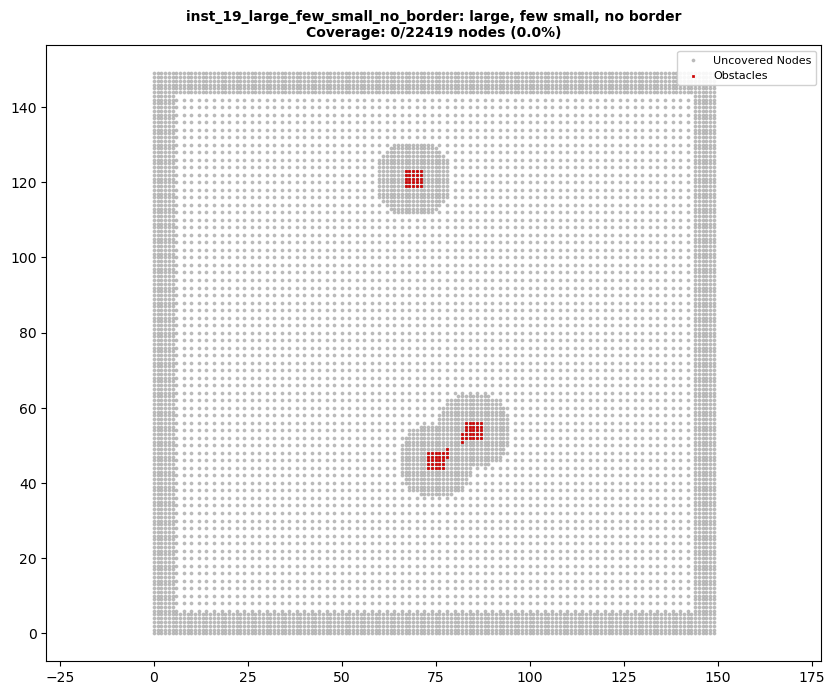

--------------------------------------------------------------------------------
inst_20_large_few_small_with_border: large, few small, with border
Coverage: 0/21201 nodes (0.0%)
Obstacles: 0/1315 covered


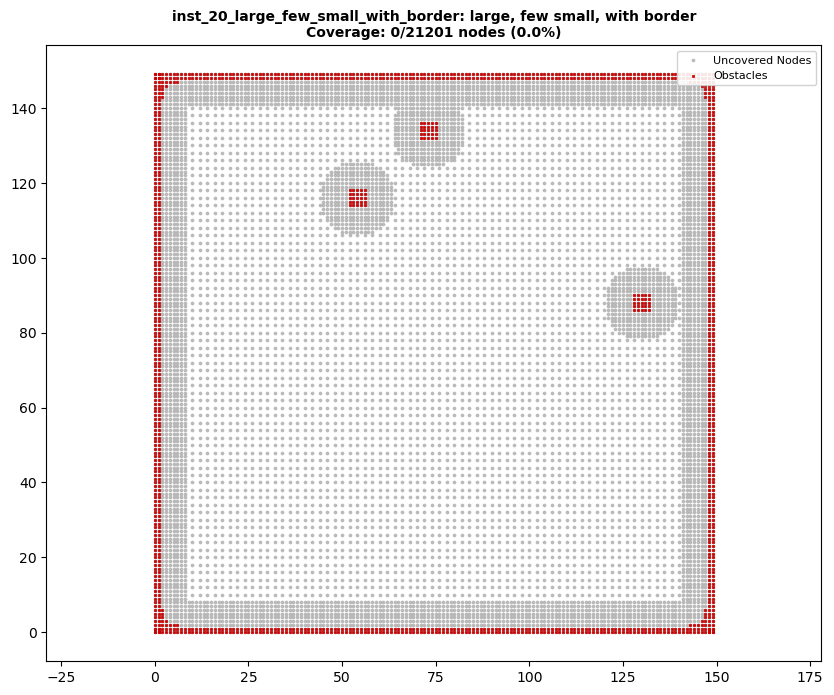

--------------------------------------------------------------------------------
inst_21_large_many_small_no_border: large, many small, no border
Coverage: 0/22319 nodes (0.0%)
Obstacles: 0/181 covered


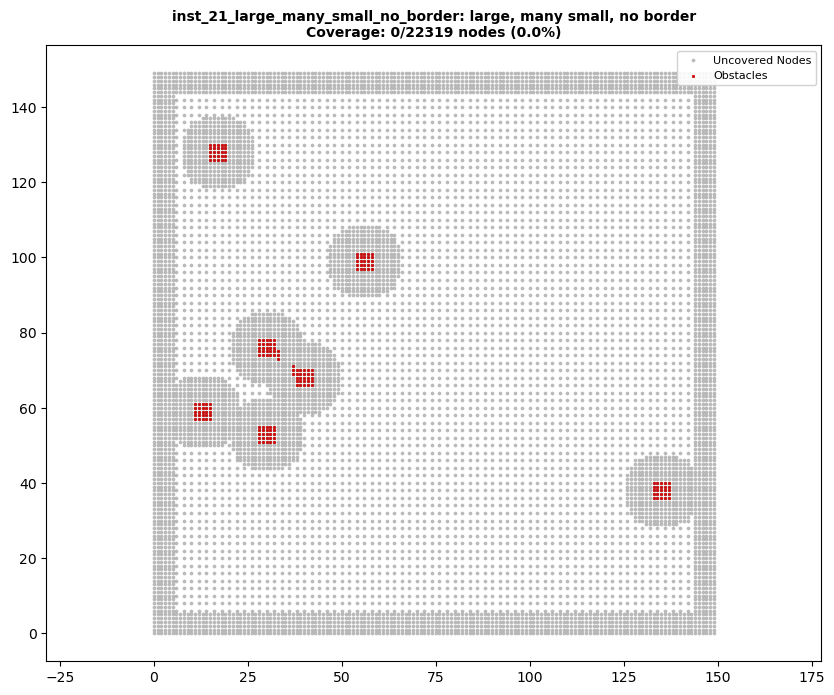

--------------------------------------------------------------------------------
inst_22_large_many_small_with_border: large, many small, with border
Coverage: 0/21099 nodes (0.0%)
Obstacles: 0/1417 covered


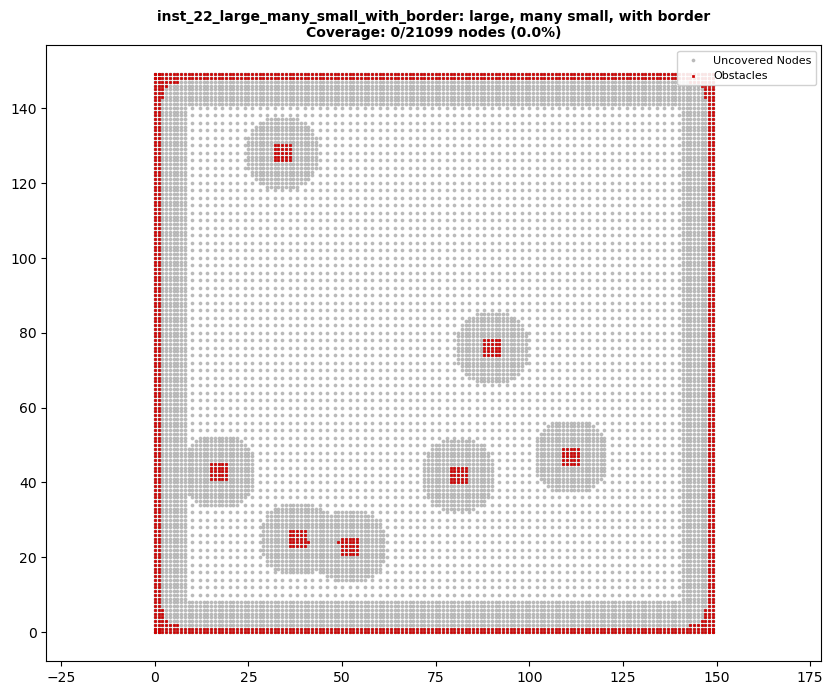

--------------------------------------------------------------------------------
inst_23_large_few_large_no_border: large, few large, no border
Coverage: 0/21618 nodes (0.0%)
Obstacles: 0/882 covered


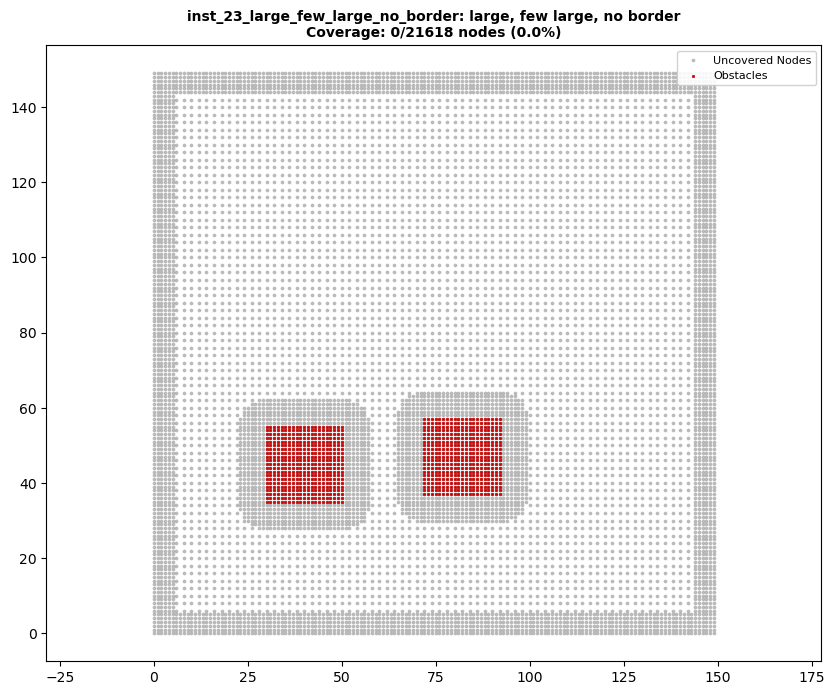

--------------------------------------------------------------------------------
inst_24_large_few_large_with_border: large, few large, with border
Coverage: 0/20394 nodes (0.0%)
Obstacles: 0/2122 covered


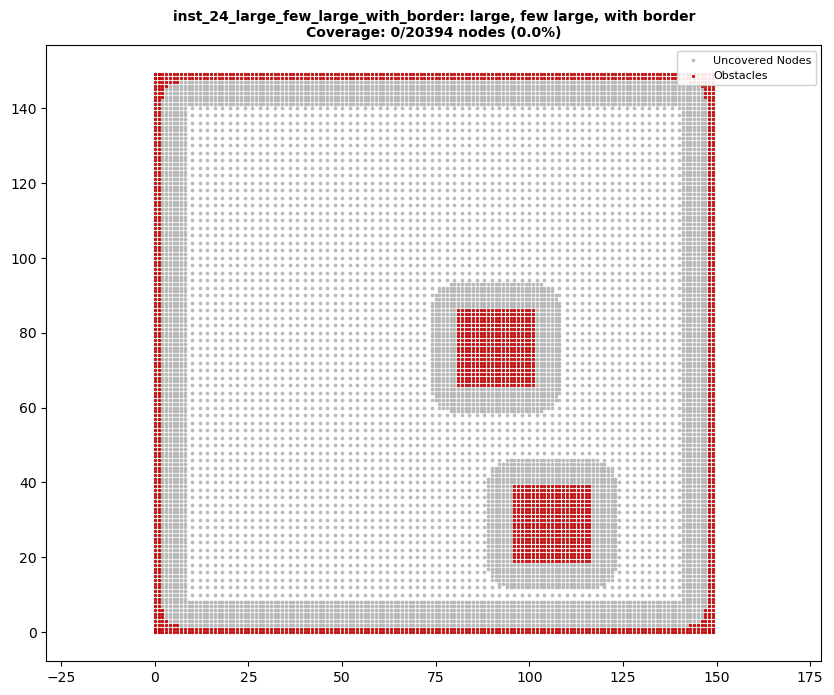

--------------------------------------------------------------------------------


In [5]:
# Visualize all instances with empty paths
for instance_name in sorted(instances.keys()):
    instance_data = instances[instance_name]
    inst = instance_data['instance']
    evaluator = instance_data['evaluator']
    
    # Create title with instance details
    size = instance_data['size']
    obstacle_type = instance_data['obstacle_type'].replace('_', ' ')
    border = "with border" if instance_data['border'] else "no border"
    sprayer_length = instance_data['sprayer_length']
    title = f"{instance_name}: {size}, {obstacle_type}, {border}, sprayer={sprayer_length}"
    
    # Display with empty path
    display_grid_and_path(inst, evaluator, [], title_suffix=title)
    print("-" * 80)

## Instance Summary

Let's create a summary table of all instances with their characteristics.

In [7]:
import pandas as pd

# Create summary data
summary_data = []
for instance_name in sorted(instances.keys()):
    instance_data = instances[instance_name]
    inst = instance_data['instance']
    
    summary_data.append({
        'Instance': instance_name,
        'Size': instance_data['size'],
        'Obstacle Type': instance_data['obstacle_type'],
        'Border': 'Yes' if instance_data['border'] else 'No',
        'Sprayer Length': instance_data['sprayer_length'],
        'Grid Nodes': len(inst.grid_nodes),
        'Target Nodes': inst.target_node_count,
        'Obstacle Nodes': len(inst.obstacle_nodes) if len(inst.obstacle_nodes) > 0 else 0
    })

# Create DataFrame
df = pd.DataFrame(summary_data)
print(df.to_string(index=False))

# Group by categories
print("\n" + "="*80)
print("SUMMARY BY SIZE:")
print(df.groupby('Size').agg({
    'Grid Nodes': 'mean',
    'Target Nodes': 'mean',
    'Obstacle Nodes': 'mean'
}).round(0))

print("\n" + "="*80)
print("SUMMARY BY OBSTACLE TYPE:")
print(df.groupby('Obstacle Type').agg({
    'Grid Nodes': 'mean',
    'Target Nodes': 'mean',
    'Obstacle Nodes': 'mean'
}).round(0))

print("\n" + "="*80)
print("SUMMARY BY SPRAYER LENGTH:")
print(df.groupby('Sprayer Length').agg({
    'Grid Nodes': 'mean',
    'Target Nodes': 'mean',
    'Obstacle Nodes': 'mean'
}).round(0))

                             Instance   Size Obstacle Type Border  Grid Nodes  Target Nodes  Obstacle Nodes
         inst_01_small_none_no_border  small          none     No        1417          2500               0
       inst_02_small_none_with_border  small          none    Yes        1732          2076             440
    inst_03_small_few_small_no_border  small     few_small     No        2000          2425              75
  inst_04_small_few_small_with_border  small     few_small    Yes        2190          1793             723
   inst_05_small_many_small_no_border  small    many_small     No        2105          2280             220
 inst_06_small_many_small_with_border  small    many_small    Yes        2266          1306            1210
    inst_07_small_few_large_no_border  small     few_large     No        2150          2258             242
  inst_08_small_few_large_with_border  small     few_large    Yes        2284          1478            1038
        inst_09_medium_none_

## Save Instances to Pickle Files

Save all instances to the `agricultural_csp/instances` directory for later use.

In [ ]:
import pickle
import os

# Create the instances directory if it doesn't exist
instances_dir = 'agricultural_csp/instances'
os.makedirs(instances_dir, exist_ok=True)

# Save each instance to a pickle file
for instance_name, instance_data in instances.items():
    # Extract just the instance object (not the whole metadata dict)
    inst = instance_data['instance']
    
    # Create filename
    filename = f"{instance_name}.pkl"
    filepath = os.path.join(instances_dir, filename)
    
    # Save to pickle
    with open(filepath, 'wb') as f:
        pickle.dump(inst, f)
    
    print(f"✓ Saved {filename}")

print(f"\n✓ Successfully saved {len(instances)} instances to {instances_dir}/")

# Also save a metadata file with instance information
metadata = {}
for instance_name, instance_data in instances.items():
    inst = instance_data['instance']
    metadata[instance_name] = {
        'size': instance_data['size'],
        'obstacle_type': instance_data['obstacle_type'],
        'border': instance_data['border'],
        'sprayer_length': instance_data['sprayer_length'],
        'grid_nodes_count': len(inst.grid_nodes),
        'target_nodes_count': inst.target_node_count,
        'obstacle_nodes_count': len(inst.obstacle_nodes) if len(inst.obstacle_nodes) > 0 else 0,
        'max_turn_angle': inst.max_turn_angle
    }

metadata_filepath = os.path.join(instances_dir, 'instances_metadata.pkl')
with open(metadata_filepath, 'wb') as f:
    pickle.dump(metadata, f)

print(f"✓ Saved metadata to instances_metadata.pkl")

## Loading Instances (Example)

Here's how to load a saved instance later:

In [ ]:
# Example: Load a specific instance
# instance_name = 'inst_01_small_none_no_border'
# filepath = f'agricultural_csp/instances/{instance_name}.pkl'

# with open(filepath, 'rb') as f:
#     loaded_instance = pickle.load(f)

# print(f"Loaded instance: {instance_name}")
# print(f"Target nodes: {loaded_instance.target_node_count}")
# print(f"Grid nodes: {len(loaded_instance.grid_nodes)}")

# Example: Load metadata
# with open('agricultural_csp/instances/instances_metadata.pkl', 'rb') as f:
#     metadata = pickle.load(f)

# print("\nAvailable instances:")
# for name, info in metadata.items():
#     print(f"  {name}: {info['size']}, {info['obstacle_type']}, border={info['border']}")